In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

sns.set_palette("Set2")
sns.set_theme(style="whitegrid", rc={'figure.dpi': 120})

In [5]:
data = pd.read_csv("../data/arxiv_data.csv")
data.head()

,ids,titles,abstracts,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.IM,astro-ph.SR,cond-mat.dis-nn,...,q-fin.RM,q-fin.ST,q-fin.TR,quant-ph,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT,stat.TH
0,1809.10336,Multi-task Learning for Financial Forecasting,Financial forecasting is challenging and att...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2305.11021,The Wisdom of Strategic Voting,We study the voting game where agents' prefe...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1704.00646,A correlation game for unsupervised learning y...,Much has been learned about plasticity of bi...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2104.03906,Explaining decisions made with AI: A workbook ...,"Over the last two years, The Alan Turing Ins...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1207.63610,Magneto-elastic coupling in the spin-Peierls g...,We report an ultrasonic study of the magneto...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536914 entries, 0 to 536913
Columns: 158 entries, ids to stat.TH
dtypes: float64(1), int64(155), object(2)
memory usage: 647.2+ MB


In [4]:
data_grouped = pd.read_csv("../data/arxiv_data_grouped.csv")
data_grouped.head()

,ids,titles,abstracts,Computer Science,Economics,Electrical Engineering and Systems Science,Mathematics,Physics,Quantitative Biology,Quantitative Finance,Statistics
0,1809.10336,Multi-task Learning for Financial Forecasting,Financial forecasting is challenging and att...,1,0,0,0,0,0,0,1
1,2305.11021,The Wisdom of Strategic Voting,We study the voting game where agents' prefe...,1,0,0,0,0,0,0,0
2,1704.00646,A correlation game for unsupervised learning y...,Much has been learned about plasticity of bi...,1,0,0,0,0,1,0,0
3,2104.03906,Explaining decisions made with AI: A workbook ...,"Over the last two years, The Alan Turing Ins...",1,0,0,0,0,0,0,0
4,1207.63610,Magneto-elastic coupling in the spin-Peierls g...,We report an ultrasonic study of the magneto...,0,0,0,0,1,0,0,0


In [5]:
mlb = joblib.load('../src/utils/multilabelbinarizer.pkl')

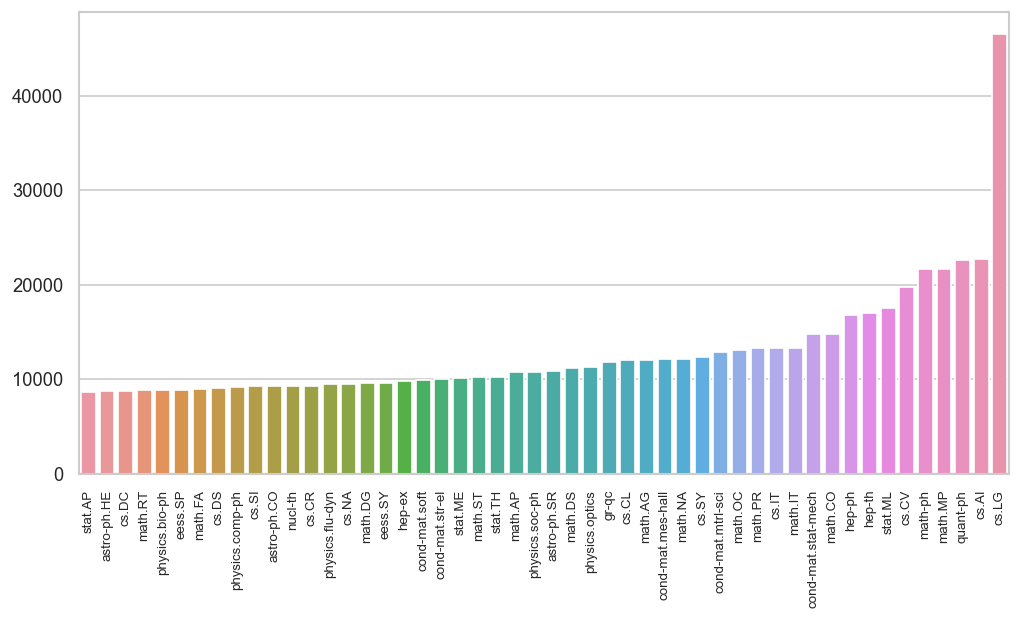

In [6]:
category_count = []
for i in range(3, data.shape[1]):
    category = data.iloc[:, i]
    category_count.append((category.name, category.value_counts()[1]))

category_count.sort(key=lambda x: x[1])
category_count = pd.DataFrame(category_count)
category_count = category_count.iloc[105:, :]

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90, size=8)
g = sns.barplot(x=category_count[0], y=category_count[1])
g.set(xlabel=None, ylabel=None)
g.figure.savefig("../img/data_50_classes.png", bbox_inches="tight")

d:\Progs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


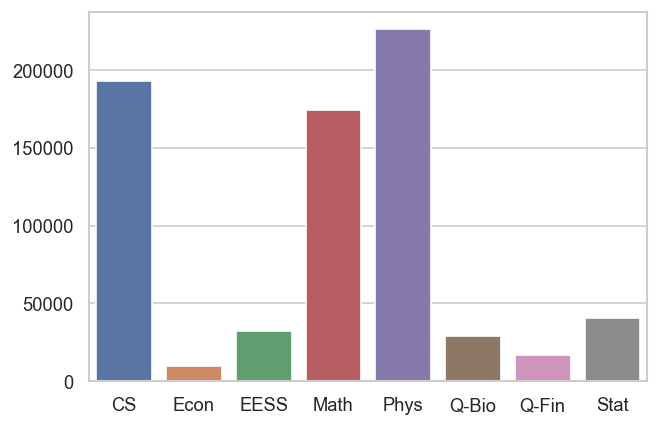

In [7]:
counts = dict()
for i in range(3, data_grouped.shape[1]):
    category = data_grouped.iloc[:, i]
    counts[category.name] = category.value_counts()[1]

keys = list(counts.keys())
plt.figure(figsize=(6, 4))
g = sns.barplot(x=keys, y=[counts[i] for i in keys])
g.set(xticklabels=["CS", "Econ", "EESS", "Math", "Phys", "Q-Bio", "Q-Fin", "Stat"]);
g.figure.savefig("../img/data_grouped_classes.png", bbox_inches="tight")